# Time series in Pandas

- 시간에 특화된 `Groupby` 기능이 필요함  
- `Time lag` 또는 `Moving Average`

Pandas에는 이에 특화된 기능을 제공

## 1. DateTimeIndex

날짜 데이터 처리를 위해 `datetime` 모듈 활용

### DateTime Object

datetime 객체를 사용하는 이유
- 일, 월, 요일 확인 가능
- 객체 간의 연산 가능

In [12]:
import pandas as pd
from datetime import datetime
date_str = '09-19-2018'

date_obj = datetime.strptime(date_str, '%m-%d-%Y').date()
print(type(date_obj))
print(date_obj)

<class 'datetime.date'>
2018-09-19


In [4]:
date_obj.day

19

In [6]:
date_obj.month

9

In [9]:
date_str2 = '05-29-2020'

date_obj2 = datetime.strptime(date_str2, '%m-%d-%Y').date()
print(date_obj2)

2020-05-29


In [10]:
date_obj2-date_obj

datetime.timedelta(days=618)

### 데이터프레임 내 Series에 적용하기

- `format` 가능한 `string` 형태로 정리
- `pd.to_datetime`을 이용하여 `DateTimeIndex` 생성

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# 2. Time Resampling

시간 기준으로 데이터 Aggregation  
`Groupby`보다 간단하고 다양한 기능 제공

In [17]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/bike-sharing.csv')
df.dtypes
# datetime : object type -> datetime type 변환 필요

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [19]:
# parse_dates : 해당 column을 datetime index로 만들어줌
df = pd.read_csv('data/bike-sharing.csv', parse_dates=['datetime'])
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [21]:
df.set_index('datetime', inplace=True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


### 월별 자전거 대여량 알아보기

In [23]:
df['month'] = df.index.month
df['year'] = df.index.year

In [26]:
df.groupby(['year', 'month'])['count'].sum()

year  month
2011  1         23552
      2         32844
      3         38735
      4         50517
      5         79713
      6         89776
      7         92848
      8         83296
      9         79104
      10        79522
      11        70889
      12        61183
2012  1         56332
      2         66269
      3         94766
      4        116885
      5        120434
      6        130957
      7        121769
      8        130220
      9        133425
      10       127912
      11       105551
      12        98977
Name: count, dtype: int64

### resample 함수

Frequency 기준을 뽑는 알파벳 제공  
ex) Q : 분기별, M : 월별, D : 일별, W : 주별

<AxesSubplot:xlabel='datetime'>

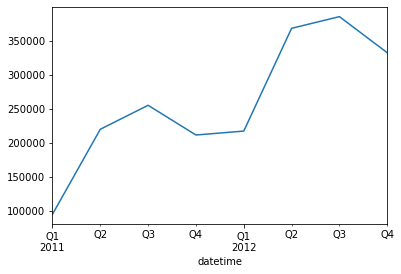

In [29]:
df['count'].resample('Q').sum().plot()

In [28]:
df['count'].resample('M').sum()

datetime
2011-01-31     23552
2011-02-28     32844
2011-03-31     38735
2011-04-30     50517
2011-05-31     79713
2011-06-30     89776
2011-07-31     92848
2011-08-31     83296
2011-09-30     79104
2011-10-31     79522
2011-11-30     70889
2011-12-31     61183
2012-01-31     56332
2012-02-29     66269
2012-03-31     94766
2012-04-30    116885
2012-05-31    120434
2012-06-30    130957
2012-07-31    121769
2012-08-31    130220
2012-09-30    133425
2012-10-31    127912
2012-11-30    105551
2012-12-31     98977
Freq: M, Name: count, dtype: int64

### Resampling - Filter

In [30]:
period = pd.date_range(
  start = '2011-01-01', end = '2011-05-31', freq='M'
)
df['count'].resample('M').sum()[period] # period에 속하는 데이터만 추출

datetime
2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
Freq: M, Name: count, dtype: int64

In [32]:
period = pd.date_range(
  start = '2011-01-01', periods=6, freq='M'
  # start 날짜부터 6개월 후까지
)
df['count'].resample('M').sum()[period] # period에 속하는 데이터만 추출

datetime
2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
Freq: M, Name: count, dtype: int64

# 3. Time shifting

시간의 차(Time lag) 분석 필요  
`time window`(`frequency`)를 기준으로 기간간 차이 분석

### shift

ex) 전날 주식 거래량 column, 전날 대비 주가 비교

In [37]:
monthly_avg = df['count'].resample('M').mean()
monthly_avg.head(3)

datetime
2011-01-31    54.645012
2011-02-28    73.641256
2011-03-31    86.849776
Freq: M, Name: count, dtype: float64

In [38]:
monthly_avg.shift(periods=2, fill_value=0) # 행 위치 옮김

datetime
2011-01-31      0.000000
2011-02-28      0.000000
2011-03-31     54.645012
2011-04-30     73.641256
2011-05-31     86.849776
2011-06-30    111.026374
2011-07-31    174.809211
2011-08-31    196.877193
2011-09-30    203.614035
2011-10-31    182.666667
2011-11-30    174.622517
2011-12-31    174.773626
2012-01-31    155.458333
2012-02-29    134.173246
2012-03-31    124.353201
2012-04-30    145.646154
2012-05-31    208.276923
2012-06-30    257.455947
2012-07-31    264.109649
2012-08-31    287.186404
2012-09-30    267.037281
2012-10-31    285.570175
2012-11-30    292.598684
2012-12-31    280.508772
Freq: M, Name: count, dtype: float64

### moving average

시계열 데이터는 노이즈 발생 -> 노이즈 줄이면서 추세 보기  
일정 범위에서 규칙적으로 연산  
ex) 날마다 일주일 간의 주가 평균 계산

In [44]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,2012
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,2012
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,2012


<AxesSubplot:xlabel='datetime'>

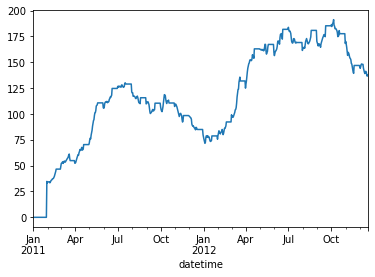

In [48]:
daily_avg =  df['count'].resample('D').mean().fillna(0)

daily_avg.rolling(window=30).mean().fillna(0).plot()
# rolling : 순차적으로 30개씩 이동평균 구하기
# 앞의 29개는 데이터의 수가 부족하므로 NaN 반환

### cumcum

누적 합 계산하기


In [57]:
avg_cumsum = monthly_avg.cumsum()
month_df = pd.concat([monthly_avg, avg_cumsum], axis=1)
month_df.columns = ['mon_avg', 'avg_cumsum']
month_df

,mon_avg,avg_cumsum
datetime,,
2011-01-31,54.645012,54.645012
2011-02-28,73.641256,128.286267
2011-03-31,86.849776,215.136043
2011-04-30,111.026374,326.162417
2011-05-31,174.809211,500.971627
2011-06-30,196.877193,697.848820
2011-07-31,203.614035,901.462855
2011-08-31,182.666667,1084.129522
2011-09-30,174.622517,1258.752038


<AxesSubplot:>

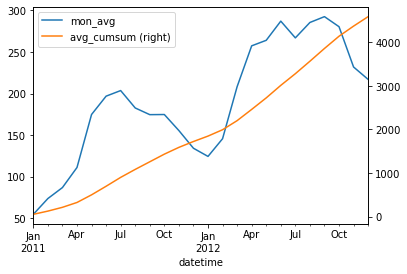

In [60]:
ax = month_df.plot(y='mon_avg', use_index=True)
month_df.plot(y='avg_cumsum', secondary_y=True, use_index=True, ax=ax)